In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [71]:
housing_data = pd.read_csv('data/Cities - Housing.csv')
crime_data = pd.read_csv('data/Cities - Crime.csv')
income_data = pd.read_csv('data/Cities - Income.csv')

In [21]:
crime_data

,#,Name,State,Violent Crime Rates (2018),"VCR per 100,000 People",% Change (2010-2020)
0,0,New York City,New York,46113,549.61,7.69
1,1,Los Angeles,California,30126,757.39,2.67
2,2,Chicago,Illinois,27357,1012.69,1.92
3,3,Houston,Texas,24062,1037.79,9.69
4,4,Phoenix,Arizona,12110,731.87,11.21
...,...,...,...,...,...,...
183,183,McAllen,Texas,122,85.60,9.52
184,184,Thornton,Colorado,378,271.26,19.50
185,185,Visalia,California,450,337.26,13.76
186,186,Denton,Texas,439,317.39,24.47


### Questions To Ask
<p>Is there a relationship between crime rates and population growth?<p>
    <ul><li>Yes there is a statistically significant result (t-stat = -5.277), but the correlation is weak (r<sup>2</sup> = .130).</li></ul>
    <ul><li>Crime rates do appear to impact city growth (e.g. people moving away from unsafe cities), but does not appear to be the primary  reason. In addition, it is not clear whether this relationship is causal. (e.g. it might be that poor economic conditions in cities cause people to leave and to commit more crime at the same time)</li></ul>
<p>Is there a relationship between crime rates and incomes? </p>

In [22]:
y = crime_data['% Change (2010-2020)']
x = crime_data['VCR per 100,000 People']

In [29]:
x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [31]:
reg.score(x,y)
reg.coef_

array([[-0.00941099]])

In [42]:
reg.predict([[271]])

array([[13.87137708]])

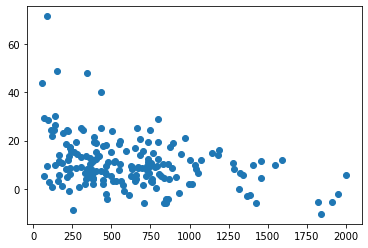

In [23]:
plt.scatter(x,y)

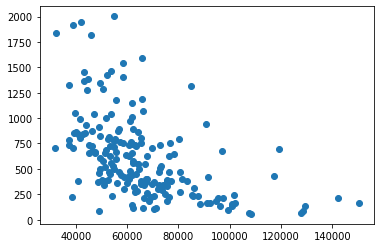

In [69]:
y = crime_data['VCR per 100,000 People']
x = income_data['Median Income (2020)']
plt.scatter(x,y)

In [73]:
y = crime_data['% Change (2010-2020)']
x = crime_data['VCR per 100,000 People']

x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Change (2010-2020)   R-squared:                       0.130
Model:                              OLS   Adj. R-squared:                  0.126
Method:                   Least Squares   F-statistic:                     27.85
Date:                  Tue, 23 Aug 2022   Prob (F-statistic):           3.63e-07
Time:                          15:36:52   Log-Likelihood:                -696.71
No. Observations:                   188   AIC:                             1397.
Df Residuals:                       186   BIC:                             1404.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     16.4218      1.313     12.510      0.000      13.832      19.012
VCR per 100,000 People    -0.0094      0.002     -5.277      0.000      -0.013      -0.006
==============================================================================
Omnibus:                       77.506   Durbin-Watson:                   1.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.121
Skew:                           1.555   Prob(JB):                     1.70e-73
Kurtosis:                       8.754   Cond. No.                     1.34e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Change (2010-2020)   R-squared:                       0.025
Model:                              OLS   Adj. R-squared:                  0.020
Method:                   Least Squares   F-statistic:                     4.741
Date:                  Tue, 23 Aug 2022   Prob (F-statistic):             0.0307
Time:                          15:40:36   Log-Likelihood:                -707.46
No. Observations:                   188   AIC:                             1419.
Df Residuals:                       186   BIC:                             1425.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               8.2598      1.332      6.200      0.000       5.632      10.888
2020 Home Price  6.986e-06   3.21e-06      2.177      0.031    6.57e-07    1.33e-05
==============================================================================
Omnibus:                       86.603   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              409.797
Skew:                           1.734   Prob(JB):                     1.03e-89
Kurtosis:                       9.347   Cond. No.                     7.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

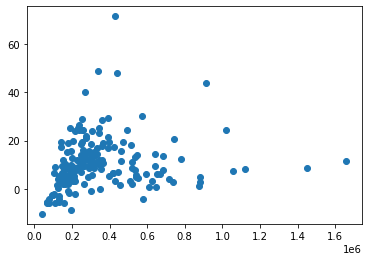

In [81]:
y = housing_data['% Change (2010-2020)']
x = housing_data['2020 Home Price']

plt.scatter(x,y)
x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()

In [70]:
y = crime_data['VCR per 100,000 People']
x = income_data['Median Income (2020)']

x1 = sm.add_constant(x)
results = sm.OLS(y,x1).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     VCR per 100,000 People   R-squared:                       0.268
Model:                                OLS   Adj. R-squared:                  0.264
Method:                     Least Squares   F-statistic:                     68.11
Date:                    Tue, 23 Aug 2022   Prob (F-statistic):           2.78e-14
Time:                            15:21:19   Log-Likelihood:                -1366.1
No. Observations:                     188   AIC:                             2736.
Df Residuals:                         186   BIC:                             2743.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1279.8778     84.492     15.148      0.000    1113.192    1446.563
Median Income (2020)    -0.0102      0.001     -8.253      0.000      -0.013      -0.008
==============================================================================
Omnibus:                       40.945   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.193
Skew:                           1.190   Prob(JB):                     1.90e-14
Kurtosis:                       4.550   Cond. No.                     2.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y = income_data['% Change (2010-2020)']
x_mult = pd.DataFrame()
x_mult['Median Income (2020)'] = income_data['Median Income (2020)']
x_mult['VCR per 100,000 People'] =  crime_data['VCR per 100,000 People']

x1 = sm.add_constant(x_mult)
results = sm.OLS(y,x1).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     % Change (2010-2020)   R-squared:                       0.204
Model:                              OLS   Adj. R-squared:                  0.196
Method:                   Least Squares   F-statistic:                     23.73
Date:                  Tue, 23 Aug 2022   Prob (F-statistic):           6.72e-10
Time:                          15:38:05   Log-Likelihood:                -688.37
No. Observations:                   188   AIC:                             1383.
Df Residuals:                       185   BIC:                             1392.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.1390      3.443      0.912      0.363      -3.654       9.932
Median Income (2020)       0.0002   3.93e-05      4.145      0.000    8.53e-05       0.000
VCR per 100,000 People    -0.0051      0.002     -2.561      0.011      -0.009      -0.001
==============================================================================
Omnibus:                       55.879   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.064
Skew:                           1.201   Prob(JB):                     1.94e-37
Kurtosis:                       6.977   Cond. No.                     3.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multicollinearity

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = x_mult[['VCR per 100,000 People','Median Income (2020)']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,2.022567,"VCR per 100,000 People"
1,2.022567,Median Income (2020)
